<a href="https://colab.research.google.com/github/ThePingPing/Numerical_Analysis/blob/main/AsymMultiExpansion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import sympy as sym
from sympy import *
from scipy.integrate import dblquad
from scipy.special import roots_legendre
import matplotlib.pyplot as plt

In [75]:
x, y, teta = sym.symbols('x y teta')

## initialize simpson ##################
n_x = 4
n_y = 2

a_x = 1.4
b_x = 2

a_y = 1
b_y = 1.5
########################################

## initalize Gauss ####################
n = 3
#######################################

omega_values = np.arange(1, 500, 5)  # 100 valeurs de ω
omega = 17


def intergrant_formula(x, y):
  f_expr = (x - 0.5) * sym.sin(sym.pi * (x + y) / 2)
  g_expr = 2 * x - y
  integrant  = f_expr * sym.exp(1j * teta * g_expr)
  # integrant = sym.log(x + 2*y)
  display(integrant)
  return integrant

def exact_integral(x, y, omega, a_x, b_x, a_y, b_y, n_x, n_y):

  integrand = intergrant_formula(x, y)
  print("form exact Display fonction ")
  print()

  integrand = integrand.subs({teta : omega})
  exact_integral_expr = sym.integrate(sym.integrate(integrand, (y, a_y, b_y)), (x, a_x, b_x))
  # Define a function for the exact integral
  exact_integral = exact_integral_expr.evalf()
  return exact_integral

def simpson_quadrature(x, y, a_x, b_x, a_y, b_y, n_x, n_y, omega):

  h_x = (b_x - a_x) / n_x
  h_y = (b_y - a_y) / n_y
  integral_approximation = 0
  integrand = intergrant_formula(x, y)
  print("form simpson Display fonction ")
  print()

  for i in range(n_x + 1):
    for t in range(n_y + 1):
      x_i = a_x + i*h_x
      y_i = a_y + t*h_y
      weight_x = 1 if i == 0 or i == n_x else (2 if i % 2 == 0 else 4)
      weight_y = 1 if t == 0 or t == n_y else (2 if t % 2 == 0 else 4)
      weight = weight_x * weight_y
      integral_approximation += weight * integrant.subs({x : x_i , y : y_i , teta : omega})

  integral_approximation = ((h_x * h_y) / 9) * integral_approximation.evalf()
  return integral_approximation


def gauss_quadrature(a_x, b_x, a_y, b_y, n_x, n_y, omega, n):

   nodes, weights = roots_legendre(n)
   x, y, u, v, teta = sym.symbols('x y u v teta')
   integral_approximation = 0
   print(nodes, weights)

   x = ((u * (b_x - a_x)) + (b_x + a_x)) / 2
   y = ((v * (b_y - a_y)) + (b_y + a_y)) / 2

   du = sym.diff(x, u)
   dv = sym.diff(y, v)

   func_integrant = intergrant_formula(x, y)
   print("form Gauss Display fonction ")
   print()


   for weight in weights:
    for node in nodes:
      weight_xy = weight * weight
      func_nodes = func_integrant.subs({u : node, v : node, teta : omega})
      integral_approximation += weight_xy * func_nodes

   integral_approximation = ((du * dv) * integral_approximation).evalf()
   return integral_approximation





gauss_value =  gauss_quadrature(a_x, b_x, a_y, b_y, n_x, n_y, omega, n)
simpson_value = simpson_quadrature(x, y, a_x, b_x, a_y, b_y, n_x, n_y, omega)
exact_value = exact_integral(x, y, omega, a_x, b_x, a_y, b_y, n_x, n_y)
print("the Gausse value is :", gauss_value)
print("The simpson value is: ", simpson_value)
print("The exact_value value is: ", exact_value)








[-0.77459667  0.          0.77459667] [0.55555556 0.88888889 0.55555556]


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

form Gauss Display fonction 



(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

form simpson Display fonction 



(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

form exact Display fonction 

the Gausse value is : 0.00279647225725063 + 0.116945938244632*I
The simpson value is:  -0.00148913086288697 + 0.0543680431820321*I
The exact_value value is:  -0.000525228507716498 + 0.00410095081584218*I


In [26]:
omegas = np.arange(1, 500, 10)

errors_gauss = []
errors_simpson = []

for omega in omegas:
    true_value = exact_integral(x, y, omega, a_x, b_x, a_y, b_y, n_x, n_y)

    gauss_value = gauss_quadrature(a_x, b_x, a_y, b_y, n_x, n_y, omega, n)
    simpson_value = simpson_quadrature(x, y, a_x, b_x, a_y, b_y, n_x, n_y, omega)

    # value_asym = asymptotic_expansion_quadrature(fx, gx_tag, df, oscillator, a, b, omega,  s)

    errors_gauss.append(np.abs(true_value - gauss_value))
    errors_simpson.append(np.abs(true_value - simpson_value))
    # errors_asynptotic_expansion.append(np.abs(true_value - value_asym))

plt.plot(omegas, errors_gauss, label='Gauss', color='blue')
plt.plot(omegas, errors_simpson, label='Simpson', color='orange')

# plt.plot(omegas, errors_asynptotic_expansion, label='Asymptotic Expansion', color='black')

plt.xlabel('Omega')
plt.ylabel('Error')
plt.ylim ([0, 1])
plt.title('Quadrature Error for Different Omegas')
plt.legend()
plt.show()

The Omaga now is:  1


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  6


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  11


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  16


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  21


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  26


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  31


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  36


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  41


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  46


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  51


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  56


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  61


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  66


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  71


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  76


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  81


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  86


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  91


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  96


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  101


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  106


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  111


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  116


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  121


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  126


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  131


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  136


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  141


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  146


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  151


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  156


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  161


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  166


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  171


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  176


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  181


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  186


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  191


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  196


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  201


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  206


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  211


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  216


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  221


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  226


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  231


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  236


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  241


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  246


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  251


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  256


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  261


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  266


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  271


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  276


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  281


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  286


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  291


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  296


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  301


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  306


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  311


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  316


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  321


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  326


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  331


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  336


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  341


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  346


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  351


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  356


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  361


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  366


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  371


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  376


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  381


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  386


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  391


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  396


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  401


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  406


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  411


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  416


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  421


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  426


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  431


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  436


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  441


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  446


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  451


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  456


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  461


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  466


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  471


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  476


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  481


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  486


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  491


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  496


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  501


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  506


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  511


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  516


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  521


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  526


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  531


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  536


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  541


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  546


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  551


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  556


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  561


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  566


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  571


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  576


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  581


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  586


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  591


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  596


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  601


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  606


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  611


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  616


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  621


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  626


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  631


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  636


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  641


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  646


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  651


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  656


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  661


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  666


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  671


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  676


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  681


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  686


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  691


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  696


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  701


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  706


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  711


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  716


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  721


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  726


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  731


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  736


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  741


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  746


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  751


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  756


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  761


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  766


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  771


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  776


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  781


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  786


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  791


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  796


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  801


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  806


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  811


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  816


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  821


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  826


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  831


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  836


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  841


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  846


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  851


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  856


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  861


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  866


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  871


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  876


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  881


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  886


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  891


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  896


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  901


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  906


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  911


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  916


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  921


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  926


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  931


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  936


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  941


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  946


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  951


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  956


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  961


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  966


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  971


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  976


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  981


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  986


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  991


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

The Omaga now is:  996


(0.3*u + 1.2)*exp(1.0*I*teta*(0.6*u - 0.25*v + 2.15))*sin(pi*(0.15*u + 0.125*v + 1.475))

(x - 0.5)*exp(1.0*I*teta*(2*x - y))*sin(pi*(x/2 + y/2))

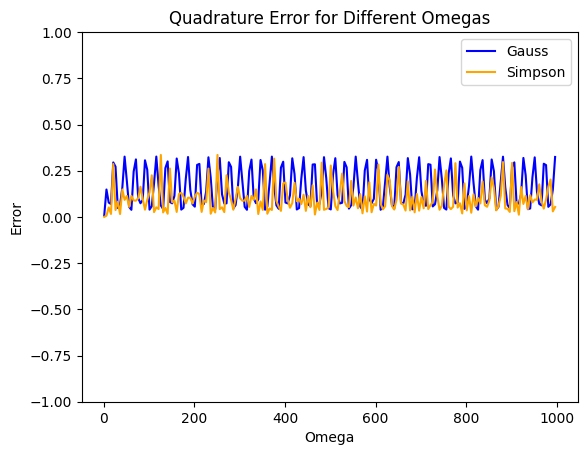

In [81]:
x, y, teta = sym.symbols('x y teta')

## initialize simpson ##################
n_x = 4
n_y = 2

a_x = 1.4
b_x = 2

a_y = 1
b_y = 1.5
########################################

## initalize Gauss ####################
n = 3
#######################################

omegas = np.arange(1, 1000, 5)



def integrand_formula(x, y):
  f_expr = (x - 0.5) * sym.sin(sym.pi * (x + y) / 2)
  g_expr = 2 * x - y
  integrand  = f_expr * sym.exp(1j * teta * g_expr)
  # integrant = sym.log(x + 2*y)
  return integrand

def exact_integral(x, y, omega, a_x, b_x, a_y, b_y, n_x, n_y):

  integrand = integrand_formula(x, y)
  # print("form exact Display fonction ")
  # print()

  integrand = integrand.subs({teta : omega})
  exact_integral_expr = sym.integrate(sym.integrate(integrand, (y, a_y, b_y)), (x, a_x, b_x))
  # Define a function for the exact integral
  exact_integral = exact_integral_expr.evalf()
  return exact_integral

def simpson_quadrature(x, y, a_x, b_x, a_y, b_y, n_x, n_y, omega):

  h_x = (b_x - a_x) / n_x
  h_y = (b_y - a_y) / n_y
  integral_approximation = 0
  integrand = intergrant_formula(x, y)
  # print("form simpson Display fonction ")
  # print()

  for i in range(n_x + 1):
    for t in range(n_y + 1):
      x_i = a_x + i*h_x
      y_i = a_y + t*h_y
      weight_x = 1 if i == 0 or i == n_x else (2 if i % 2 == 0 else 4)
      weight_y = 1 if t == 0 or t == n_y else (2 if t % 2 == 0 else 4)
      weight = weight_x * weight_y
      integral_approximation += weight * integrand.subs({x : x_i , y : y_i , teta : omega})

  integral_approximation = ((h_x * h_y) / 9) * integral_approximation.evalf()
  return integral_approximation


def gauss_quadrature(a_x, b_x, a_y, b_y, n_x, n_y, omega, n):

   nodes, weights = roots_legendre(n)
   x, y, u, v, teta = sym.symbols('x y u v teta')
   integral_approximation = 0

   x = ((u * (b_x - a_x)) + (b_x + a_x)) / 2
   y = ((v * (b_y - a_y)) + (b_y + a_y)) / 2

   du = sym.diff(x, u)
   dv = sym.diff(y, v)

   func_integrand = intergrant_formula(x, y)
  #  print("form Gauss Display fonction ")
  #  print()


   for weight in weights:
    for node in nodes:
      weight_xy = weight * weight
      func_nodes = func_integrand.subs({u : node, v : node, teta : omega})
      integral_approximation += weight_xy * func_nodes

   integral_approximation = ((du * dv) * integral_approximation).evalf()
   return integral_approximation



errors_gauss = []
errors_simpson = []

for omega in omegas:

    print("The Omaga now is: ", omega)
    true_value = exact_integral(x, y, omega, a_x, b_x, a_y, b_y, n_x, n_y)

    gauss_value = gauss_quadrature(a_x, b_x, a_y, b_y, n_x, n_y, omega, n)
    simpson_value = simpson_quadrature(x, y, a_x, b_x, a_y, b_y, n_x, n_y, omega)

    # value_asym = asymptotic_expansion_quadrature(fx, gx_tag, df, oscillator, a, b, omega,  s)

    errors_gauss.append(np.abs(true_value - gauss_value))
    errors_simpson.append(np.abs(true_value - simpson_value))
    # errors_asynptotic_expansion.append(np.abs(true_value - value_asym))

plt.plot(omegas, errors_gauss, label='Gauss', color='blue')
plt.plot(omegas, errors_simpson, label='Simpson', color='orange')

# plt.plot(omegas, errors_asynptotic_expansion, label='Asymptotic Expansion', color='black')

plt.xlabel('Omega')
plt.ylabel('Error')
plt.ylim ([-1, 1])
plt.title('Quadrature Error for Different Omegas')
plt.legend()
plt.show()